# Data Analyst Professional Practical Exam Submission

David Galera


## Data validation

**week**: Values are positive integers. No cleaning is needed.

**sales_method**: There were 5 categories due to spelling errors. The categories 'em + call' and 'email' have been replaced with 'Email + Call' and 'Email', so the column ends with 3 categories as the description indicates. There are no missing values.

**customer_id**: 15000 unique characters without missing values, same as the description. No cleaning is needed.

**nb_sold**: Numeric values without missing values, same as the description. No cleaning is needed.

**revenue**: There were 1074 missing values, they have been replaced with the median rounded to 2 decimal places.

**years_as_customer**: Numeric values without missing values. 2 clients had a greater number of years as a customer than possible, since the company was founded in 1984. These values are not possible so I replaced them with the maximum possible number of years as a client that is possible, 2023-1984 = **39**.

**nb_site_visits**: Numeric values without missing values, same as the description. No cleaning is needed.

**state**: Character values without missing values, same as the description. No cleaning is needed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('product_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df.week.value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

In [5]:
df.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [6]:
df['sales_method'] = df['sales_method'].replace(['em + call','email'], ['Email + Call','Email'])
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [7]:
df['customer_id'].nunique()

15000

In [8]:
(df['nb_sold']>0).sum()

15000

In [9]:
df['revenue'].isna().sum()

1074

In [10]:
df.loc[df['revenue'].isnull(),'revenue']=round(df['revenue'].median(),2)
df['revenue'].isna().sum()

0

In [11]:
max(df.years_as_customer.value_counts().index)

63

In [12]:
min(df.years_as_customer.value_counts().index)

0

In [13]:
df.loc[df['years_as_customer']>(2023-1984),'years_as_customer']

13741    63
13800    47
Name: years_as_customer, dtype: int64

In [14]:
df.loc[df['years_as_customer']>(2023-1984),'years_as_customer']=(2023-1984)
df.loc[df['years_as_customer']>(2023-1984),'years_as_customer']

Series([], Name: years_as_customer, dtype: int64)

In [15]:
df['nb_site_visits'].value_counts()

25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

In [16]:
df['state'].value_counts().sort_index()

Alabama            214
Alaska              40
Arizona            321
Arkansas           132
California        1872
Colorado           230
Connecticut        179
Delaware            34
Florida            904
Georgia            489
Hawaii              72
Idaho               62
Illinois           617
Indiana            354
Iowa               165
Kansas             142
Kentucky           213
Louisiana          230
Maine               63
Maryland           263
Massachusetts      294
Michigan           498
Minnesota          245
Mississippi        139
Missouri           311
Montana             45
Nebraska            91
Nevada             102
New Hampshire       53
New Jersey         434
New Mexico          84
New York           965
North Carolina     459
North Dakota        30
Ohio               566
Oklahoma           196
Oregon             229
Pennsylvania       598
Rhode Island        43
South Carolina     224
South Dakota        41
Tennessee          340
Texas             1187
Utah       

## How many customers were there for each sale strategy?

From the new line of office stationery launched six weeks ago, approximately half of the customers came from the **Email** strategy, followed by the **Call** method with approximately a third of the customers, the remaining customers came from the **Email + Call** strategy which represented about one sixth of the total. Therefore, we can conclude that **Email** sales strategy seems the most effective one while the **Email + Call**, the least.

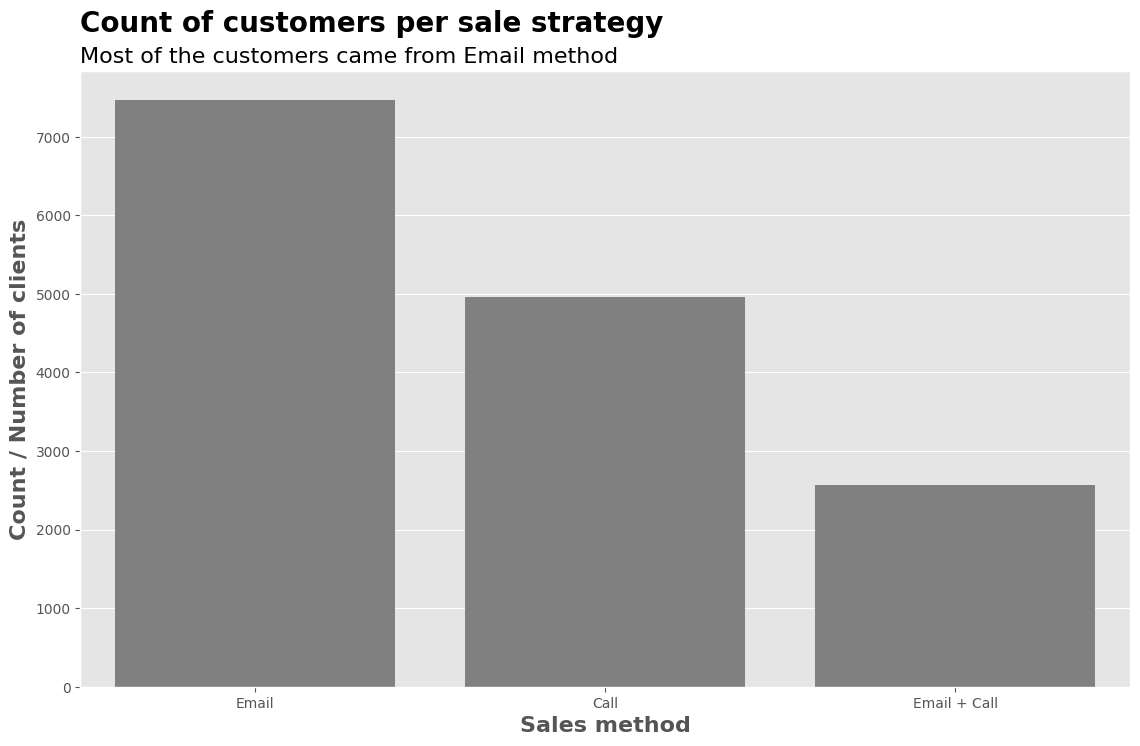

In [17]:
fig, axes = plt.subplots(figsize=(15,8))
sns.countplot(x=df['sales_method'],ax=axes,color='gray',order=['Email','Call', 'Email + Call'])#.set(title='Count of claims per location')
plt.title('Count of customers per sale strategy', fontsize=20, fontweight='bold',y=1.05,loc='left')
#plt.suptitle('Most claims are processed in RECIFE', fontsize=16, y=0.91,ha='right')
#axes.set(xlabel='Location',fontsize=20, fontweight='bold')
plt.text(0.2, 0.89, 'Most of the customers came from Email method', fontsize=16, transform=plt.gcf().transFigure)
plt.xlabel('Sales method', fontweight='bold',fontsize=16)
plt.ylabel('Count / Number of clients', fontweight='bold',fontsize=16)
#plt.suptitle('Subtitle: Data Trends', fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show();

## How the revenue is distributed?

We want to compare the revenue from the sales across all customers. From the chart below, we can see that revenue is not normally distributed. Most of the customers generate less than 125 of revenue, even so, a small proportion customers generate more than 150 in sales revenue, which could be considered outliers. I am not sure about revenue units, so I prefer not to specify them.

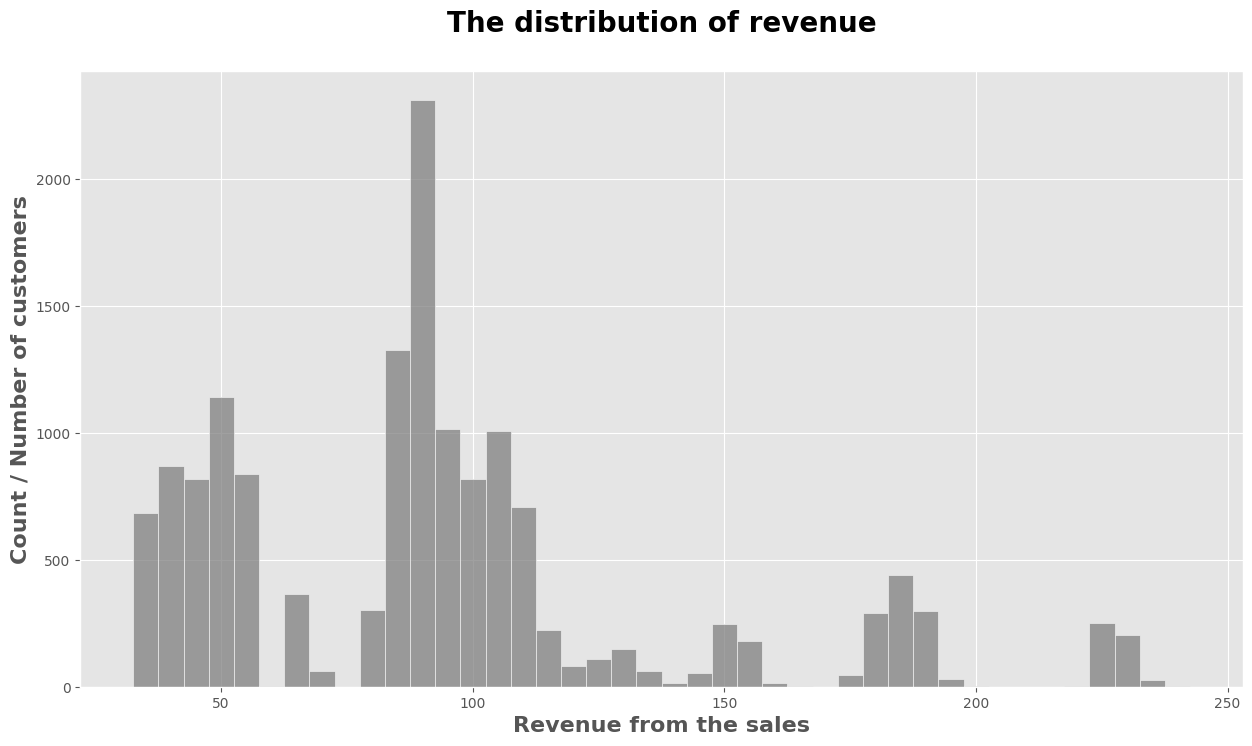

In [18]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(x=df['revenue'],ax=axes,color='gray',binwidth=5)#.set(title='The distribution of revenue'), binwidth=10
plt.title('The distribution of revenue', fontsize=20, fontweight='bold',y=1.05)
plt.xlabel('Revenue from the sales', fontweight='bold',fontsize=16)
plt.ylabel('Count / Number of customers', fontweight='bold',fontsize=16)
plt.show();

We further investigate the distribution of revenue coming for each strategy. From the multiple boxplots below, we can see that the revenue range of **Email + Call** strategy is much higher than in the rest of strategies. Most of the sales revenue from this strategy range from 150 and 190 while there are no sales from the other strategies that reach the value of 150. We can also see that the maximum value registered from a sale from the **Call** strategy is less than 90, suggesting that this method generates much less revenue than the others. 

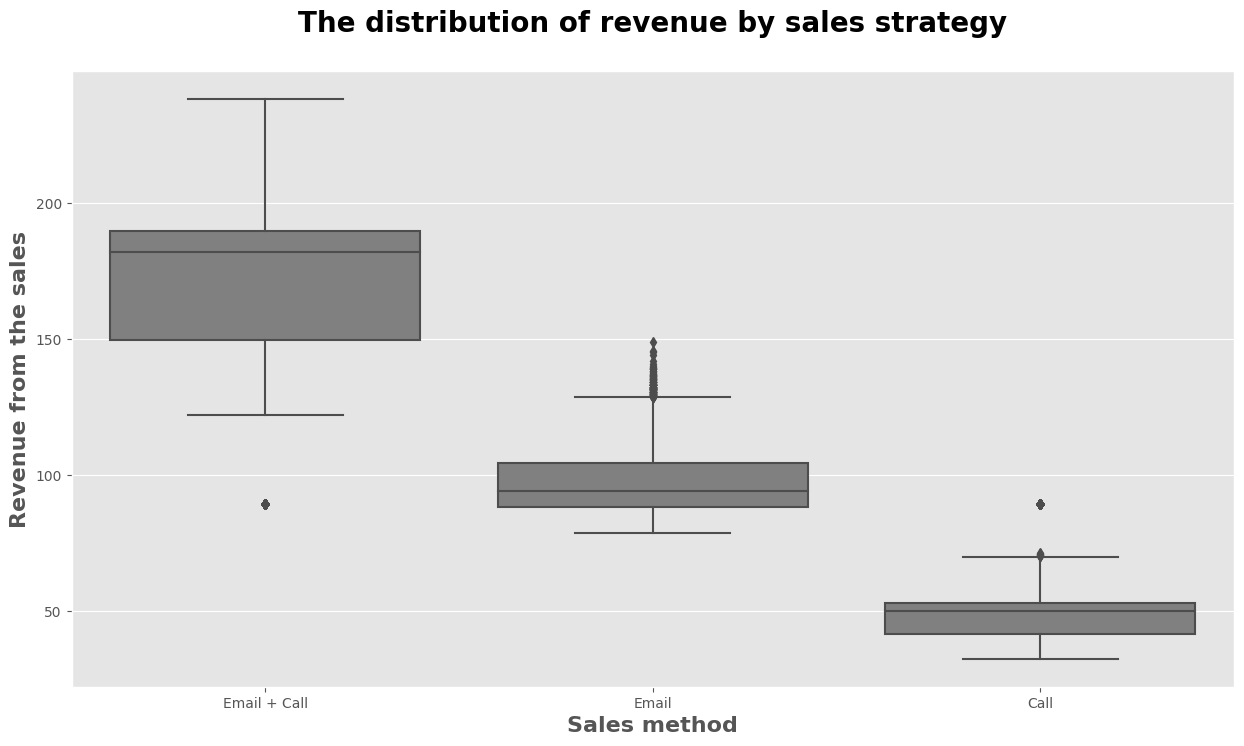

In [23]:
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(x=df['sales_method'],y=df['revenue'],ax=axes,color='gray',order=['Email + Call','Email','Call'])#.set(title='The distribution of revenue'), binwidth=10
plt.title('The distribution of revenue by sales strategy', fontsize=20, fontweight='bold',y=1.05)
plt.xlabel('Sales method', fontweight='bold',fontsize=16)
plt.ylabel('Revenue from the sales', fontweight='bold',fontsize=16)
plt.show();

## Was there any difference in revenue over time for each of the methods?

We want to know if the revenue per sales strategy has changed over time. From the bar chart below, we can see that the average revenue for each sales method has increased steadily over time since the product was launched. Furthermore, the rate of increase is similar in all sales strategies.

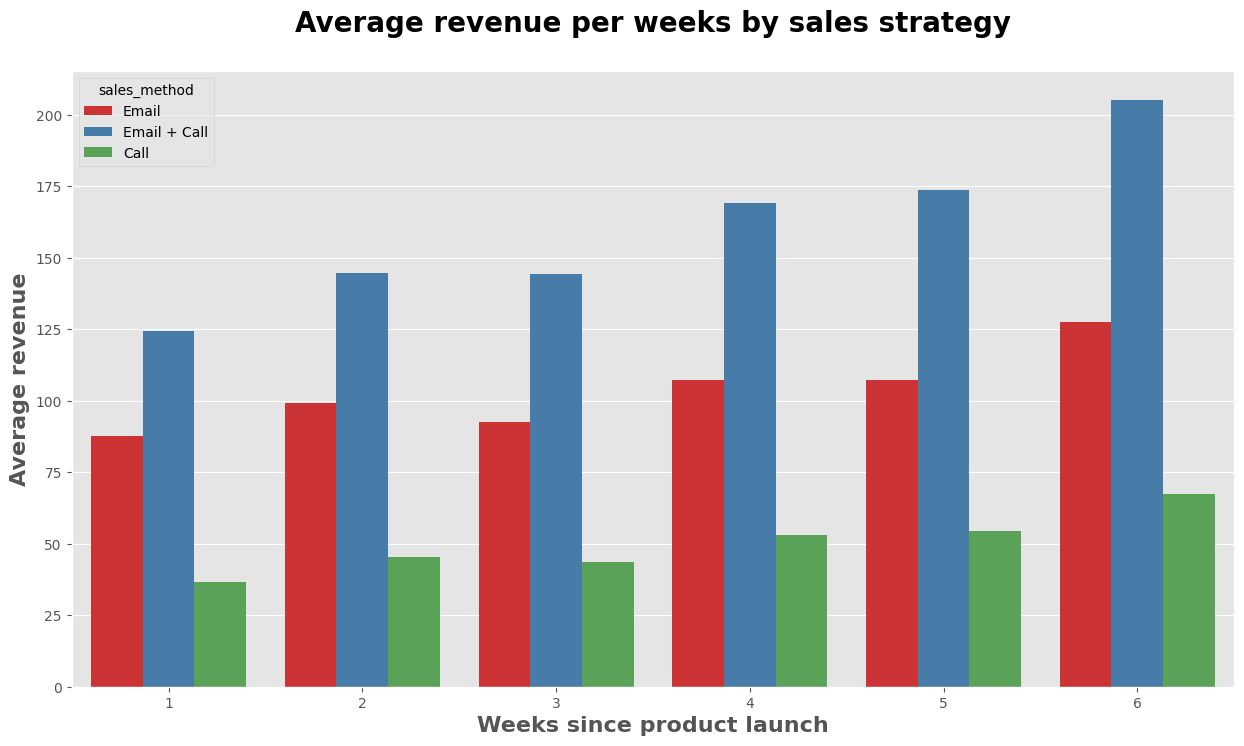

In [22]:
fig, axes = plt.subplots(figsize=(15,8))
sns.barplot(x=df['week'],y=df['revenue'],ax=axes,
            color='gray',hue=df['sales_method'],palette='Set1',errorbar=None)
plt.title('Average revenue per weeks by sales strategy', fontsize=20, fontweight='bold',y=1.05)
plt.xlabel('Weeks since product launch', fontweight='bold',fontsize=16)
plt.ylabel('Average revenue', fontweight='bold',fontsize=16)
plt.show();

We further investigate if years as a customer affect the revenue of each sales strategy. From the bar chart below, we can see that the average revenue of each sales method is approximately constant across years as a customer, although in some years there is a bit of variation, as we can see for example in year 39, where the average revenue of the **Email + Call** strategy is substantially lower than for the rest of the years. We conclude that the number of years as customer do not affect the revenue of the sales strategy.

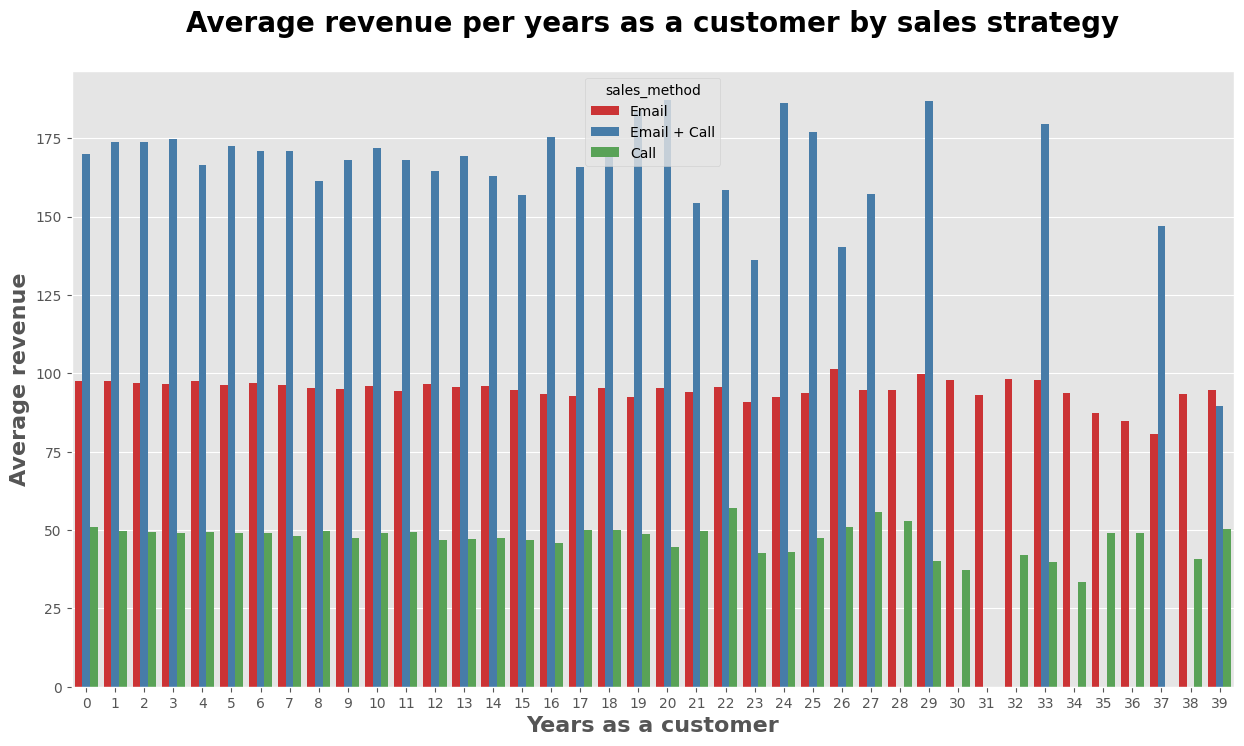

In [25]:
fig, axes = plt.subplots(figsize=(15,8))
sns.barplot(x=df['years_as_customer'],y=df['revenue'],ax=axes,
            color='gray',hue=df['sales_method'],palette='Set1',errorbar=None)
plt.title('Average revenue per years as a customer by sales strategy', fontsize=20, fontweight='bold',y=1.05)
plt.xlabel('Years as a customer', fontweight='bold',fontsize=16)
plt.ylabel('Average revenue', fontweight='bold',fontsize=16)
plt.show();

## Business metrics

Since our goal is to find the best techniques to sell the new product effectively and increase revenue and given that **Email** and **Email + Call** sales methods produce higher revenue and require less effort from the team than **Call** strategy, the business should focus on **minimizing the percentage of customers advertised by this strategy which are 33% based on the last 6 weeks data, so this should be our metric**. The business should also increase the percentage of customers coming from **Email + Call** sales strategy which is about 1/6 of the total according to the sales tracking system data, because this method produces much revenue than the others.

I would also recommend we use **the revenue per time spended on each customer** as another business metric in order to identify which technique is more efficient. Unfortunately, we don't have data about the time spent on each customer to estimate a baseline value for that metric.

## Recomendation

For the following weeks, I would recommend we can focus on the following steps:

- Using key metrics to monitor whether there is a strong sign of a increase in revenue.
- Focus on reducing the percentage of customers contacted only by Call, instead, email them beforehand.
- Consider sticking to Email and Email + Call sales strategies only.
- Stay on top of the current office stationery markets so that the newest information can be integrated in the sales strategy.
- Data Collection for in-depth analysis.
- Improve data quality - what are units of the revenue variable?
- New related data - Time spended on each customer?